# 1. Import Dependencies

In [ ]:
import numpy as py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 2. Get the data

In [ ]:
# Read the CSV file, specifying the delimiter and handling missing data
credit_card_data = pd.read_csv('creditcard.csv', error_bad_lines=False)

# Print the first 5 rows of the DataFrame
print(credit_card_data.head())


C:\Users\Admin\AppData\Local\Temp\ipykernel_3896\2052467156.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  credit_card_data = pd.read_csv('creditcard.csv', error_bad_lines=False)
b'Skipping line 5966: expected 31 fields, saw 51\nSkipping line 11956: expected 31 fields, saw 42\nSkipping line 15937: expected 31 fields, saw 40\nSkipping line 19911: expected 31 fields, saw 33\nSkipping line 21905: expected 31 fields, saw 46\nSkipping line 25880: expected 31 fields, saw 49\n'
b'Skipping line 37764: expected 31 fields, saw 39\nSkipping line 41725: expected 31 fields, saw 59\nSkipping line 45685: expected 31 fields, saw 47\nSkipping line 51626: expected 31 fields, saw 51\nSkipping line 55589: expected 31 fields, saw 36\nSkipping line 59549: expected 31 fields, saw 32\nSkipping line 63510: expected 31 fields, saw 37\nSkipping line 65490: expected 31 fields, saw 41\n'
b'Skipping line 69453: expec

   Time        V1                   V2        V3        V4        V5  \
0   0.0 -1.359807  -0.0727811733098497  2.536347  1.378155 -0.338321   
1   0.0  1.191857     0.26615071205963  0.166480  0.448154  0.060018   
2   1.0 -1.358354    -1.34016307473609  1.773209  0.379780 -0.503198   
3   1.0 -0.966272   -0.185226008082898  1.792993 -0.863291 -0.010309   
4   2.0 -1.158233    0.877736754848451  1.548718  0.403034 -0.407193   

         V6        V7        V8        V9  ...                   V21  \
0  0.462388  0.239599  0.098698  0.363787  ...    -0.018306777944153   
1 -0.082361 -0.078803  0.085102 -0.255425  ...    -0.225775248033138   
2  1.800499  0.791461  0.247676 -1.514654  ...     0.247998153469754   
3  1.247203  0.237609  0.377436 -1.387024  ...    -0.108300452035545   
4  0.095921  0.592941 -0.270533  0.817739  ...  -0.00943069713232919   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.1335

In [ ]:
# Print the last 5 rows of the DataFrame
print(credit_card_data.tail())

           Time        V1        V2        V3        V4        V5        V6  \
249608  80109.0  1.310383  0.148796 -0.106156  0.245652  0.376795  0.276660   
249609  80109.0  1.187695  0.161777 -0.102921  0.367072  0.000082 -0.725995   
249610  80109.0  1.210400 -0.061808  0.934410  1.149472 -0.586856  0.269742   
249611  80110.0 -0.357977 -0.288527  1.506609 -2.484692 -1.031518 -0.910416   
249612  80110.0 -1.824050   0.75046  1.120322  1.158644 -0.184192 -0.196253   

              V7        V8        V9  ...       V21       V22       V23  \
249608 -0.048826  0.027499  0.151769  ... -0.321307 -0.897167 -0.008168   
249609  0.370336 -0.169480 -0.441230  ... -0.329042 -1.104087  0.058738   
249610 -0.582677  0.148328  0.963741  ... -0.118127 -0.134792 -0.107835   
249611 -0.259715  0.024064 -2.413570  ... -0.077703  0.151033  -0.00462   
249612 -0.008336  0.202622 -0.182532  ... -0.156936 -0.392619 -0.116801   

             V24       V25       V26       V27       V28  Amount  Class  


In [ ]:
# dataframe information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249613 entries, 0 to 249612
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    249613 non-null  float64
 1   V1      249613 non-null  float64
 2   V2      249613 non-null  object 
 3   V3      249613 non-null  float64
 4   V4      249613 non-null  float64
 5   V5      249613 non-null  float64
 6   V6      249613 non-null  float64
 7   V7      249613 non-null  float64
 8   V8      249612 non-null  float64
 9   V9      249611 non-null  float64
 10  V10     249609 non-null  object 
 11  V11     249606 non-null  float64
 12  V12     249606 non-null  float64
 13  V13     249606 non-null  object 
 14  V14     249604 non-null  float64
 15  V15     249599 non-null  object 
 16  V16     249597 non-null  float64
 17  V17     249592 non-null  float64
 18  V18     249590 non-null  float64
 19  V19     249590 non-null  float64
 20  V20     249588 non-null  float64
 21  V21     24

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time       0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         1
V9         2
V10        4
V11        7
V12        7
V13        7
V14        9
V15       14
V16       16
V17       21
V18       23
V19       23
V20       25
V21       26
V22       28
V23       32
V24       34
V25       38
V26       44
V27       48
V28       52
Amount    57
Class     60
dtype: int64

# 3. Distribution of legit transactions & fraudulent transactions

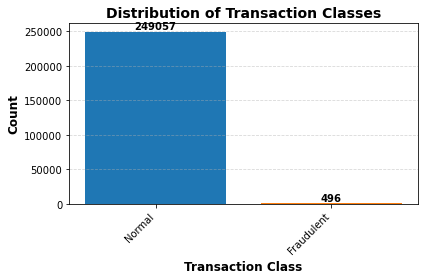

In [ ]:
import matplotlib.pyplot as plt

class_counts = credit_card_data["Class"].value_counts()

colors = ["#1f77b4", "#ff7f0e"]
plt.bar(class_counts.index, class_counts.values, color=colors)

plt.xlabel("Transaction Class", fontweight="bold", fontsize=12)
plt.ylabel("Count", fontweight="bold", fontsize=12)
plt.title("Distribution of Transaction Classes", fontweight="bold", fontsize=14)

plt.xticks(class_counts.index, ["Normal", "Fraudulent"], rotation=45, ha="right", fontsize=10)

plt.grid(axis="y", linestyle="--", alpha=0.5)

for i, count in enumerate(class_counts.values):
    plt.text(i, count + 1000, str(count), ha="center", va="bottom", fontweight="bold", fontsize=10)

plt.tight_layout()
plt.show()

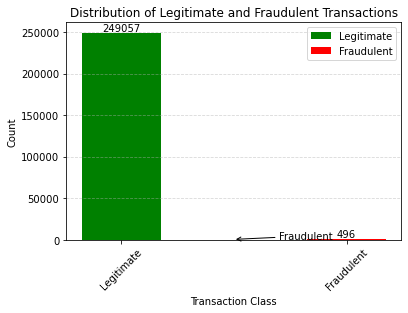

In [ ]:
import matplotlib.pyplot as plt

legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

legit_count = len(legit)
fraud_count = len(fraud)

bar_positions = [0, 1]
bar_width = 0.35

fig, ax1 = plt.subplots()

ax1.bar(bar_positions[0], legit_count, bar_width, color='green', label='Legitimate')
ax1.bar(bar_positions[1], fraud_count, bar_width, color='red', label='Fraudulent')

ax1.set_xlabel('Transaction Class')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Legitimate and Fraudulent Transactions')

ax1.set_xticks(bar_positions)
ax1.set_xticklabels(['Legitimate', 'Fraudulent'])

ax1.legend()

ax1.text(bar_positions[0], legit_count, str(legit_count), ha='center', va='bottom')
ax1.text(bar_positions[1], fraud_count, str(fraud_count), ha='center', va='bottom')

ax1.grid(axis='y', linestyle='--', alpha=0.5)

plt.xticks(rotation=45)

plt.annotate('Fraudulent', xy=(0.5, fraud_count), xytext=(0.7, fraud_count + 500),
arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()



In [ ]:
print(legit.shape)
print(fraud.shape)

(249057, 31)
(496, 31)


In [ ]:
# statistical measures of the data
legit.Amount.describe()

count    249057.000000
mean         93.662585
std         253.310482
min           0.000000
25%           6.530000
50%          24.990000
75%          84.100000
max       19656.530000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     496.000000
mean      117.101593
std       238.765544
min         0.000000
25%         1.000000
50%        15.470000
75%       101.500000
max      1809.680000
Name: Amount, dtype: float64

# 4. Compare the values for both transactions


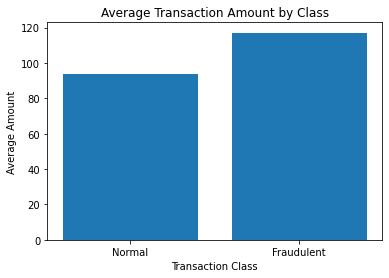

In [ ]:
import matplotlib.pyplot as plt

class_means = credit_card_data.groupby('Class').mean()

plt.bar(class_means.index, class_means['Amount'])

plt.xlabel("Transaction Class")
plt.ylabel("Average Amount")
plt.title("Average Transaction Amount by Class")

plt.xticks(class_means.index, ["Normal", "Fraudulent"])

plt.show()

# 5. Under-Sampling

In [ ]:
# Build a sample dataset containing similar distribution
# of normal transactions and fraudulent transactions
# number of Fraudulent Transaction - 731
legit_sample = legit.sample(n=731)

In [ ]:
# Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
99449,44264.0,-0.252773,0.486363,1.309434,-1.053774,-0.436655,-0.117178,-0.649498,-1.404399,0.066832,...,1.478127,-0.795314,-0.060646,0.234810,0.460343,0.845045,0.094885,0.188411,3.84,0.0
143398,54560.0,-0.527136,0.948084,-0.695599,-1.126850,2.330580,3.222901,-0.107501,1.237228,-0.842058,...,0.11267,0.064719,-0.133956,1.037885,-0.189111,0.301833,-0.017194,0.081879,1.50,0.0
194176,69345.0,1.174801,0.007121,0.101070,1.131680,0.075225,0.491208,-0.185995,0.287774,0.374281,...,-0.119659,-0.228921,-0.133357,-0.701332,0.660040,-0.280724,0.022974,-0.005840,5.34,0.0
55411,38177.0,0.735718,-0.628512,0.550752,1.336038,-0.963262,-0.587294,0.050514,-0.109504,0.379946,...,0.273236,0.261723,-0.29042,0.398492,0.424651,-0.320804,-0.005972,0.072641,249.27,0.0
53337,34598.0,-2.820219,2.458132,0.614851,-1.482664,-0.431115,1.078077,-1.607519,-6.991697,0.289095,...,6.797101,-2.538247,0.897894,0.001910,-0.450488,0.732639,0.400041,0.160542,55.93,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
246806,77154.0,-0.715414,0.60859,1.155501,-0.267565,-0.563748,-0.618898,0.698308,0.069837,-0.133341,...,0.130749,0.239389,-0.090227,0.411572,-0.216126,0.353896,-0.062361,0.008433,129.0,1.0
246857,77171.0,1.118560,1.291858,-1.298805,2.135772,0.772204,-1.147291,0.390578,-0.107072,-0.038339,...,-0.346374,-0.663588,-0.102326,0.017911,0.650302,-0.332366,0.105949,0.128124,1.0,1.0
246885,77182.0,-1.410852,2.268271,-2.297554,1.871331,0.248957,-1.208799,-1.358648,1.102916,-1.317364,...,0.155381,-0.614880,-0.196126,-0.464376,0.118473,-0.484537,0.373596,0.187657,1.0,1.0
246946,77202.0,-0.356326,1.435305,-0.813564,1.993117,2.055878,-0.543579,0.487691,0.085449,-0.536352,...,-0.312863,-0.687874,-0.267003,-1.158480,0.271460,-0.155397,0.114328,0.101526,1.0,1.0
248101,79540.0,-0.114361,1.036129,1.984405,3.128243,-0.740344,1.548619,-1.701284,-2.203842,-1.242265,...,-1.032935,1.196428,-0.112857,0.254719,0.696668,0.482370,0.129969,0.223924,0.2,1.0


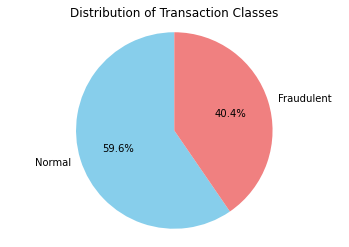

In [ ]:
import matplotlib.pyplot as plt

class_counts = new_dataset['Class'].value_counts()

plt.pie(class_counts, labels=['Normal', 'Fraudulent'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])

plt.title('Distribution of Transaction Classes')

plt.axis('equal')

plt.show()


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V3,V4,V5,V6,V7,V8,V9,V11,...,V18,V19,V20,V22,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,50798.917921,-0.140044,0.684657,0.172488,-0.273955,0.086337,-0.056840,0.04863,-0.120029,0.155221,...,-0.081860,-0.009225,0.042150,-0.154081,-0.003195,0.131001,0.018546,0.025300,0.002648,96.487756
1.0,43650.558468,-5.881845,-7.342413,4.530734,-4.181031,-1.470770,-6.170732,1.56236,-2.670419,4.074968,...,-2.801359,0.783811,0.241645,-0.321771,-0.103052,0.209617,0.048808,0.500779,0.073258,117.101593


# 6. Splitting the data into Features & Targets


In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

           Time        V1        V2        V3        V4        V5        V6  \
99449   44264.0 -0.252773  0.486363  1.309434 -1.053774 -0.436655 -0.117178   
143398  54560.0 -0.527136  0.948084 -0.695599 -1.126850  2.330580  3.222901   
194176  69345.0  1.174801  0.007121  0.101070  1.131680  0.075225  0.491208   
55411   38177.0  0.735718 -0.628512  0.550752  1.336038 -0.963262 -0.587294   
53337   34598.0 -2.820219  2.458132  0.614851 -1.482664 -0.431115  1.078077   
...         ...       ...       ...       ...       ...       ...       ...   
246806  77154.0 -0.715414   0.60859  1.155501 -0.267565 -0.563748 -0.618898   
246857  77171.0  1.118560  1.291858 -1.298805  2.135772  0.772204 -1.147291   
246885  77182.0 -1.410852  2.268271 -2.297554  1.871331  0.248957 -1.208799   
246946  77202.0 -0.356326  1.435305 -0.813564  1.993117  2.055878 -0.543579   
248101  79540.0 -0.114361  1.036129  1.984405  3.128243 -0.740344  1.548619   

              V7        V8        V9  ...       V20

In [ ]:
print(Y)

99449     0.0
143398    0.0
194176    0.0
55411     0.0
53337     0.0
         ... 
246806    1.0
246857    1.0
246885    1.0
246946    1.0
248101    1.0
Name: Class, Length: 1227, dtype: float64


In [ ]:
# Split the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1227, 30) (981, 30) (246, 30)


# 7. Model training

In [ ]:
# Logistic Regression
model = LogisticRegression(max_iter=10000)

In [ ]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

# 8. Model Evaluation

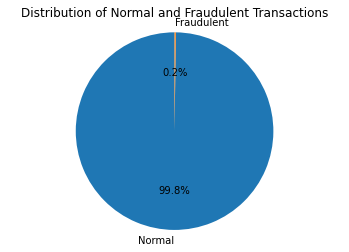

In [ ]:
import matplotlib.pyplot as plt

counts = credit_card_data['Class'].value_counts()

plt.pie(counts, labels=['Normal', 'Fraudulent'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Normal and Fraudulent Transactions')
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Predict class labels for the training data
predicted_labels = model.predict(X_train)

# Calculate the training data accuracy score
training_data_accuracy = accuracy_score(predicted_labels, Y_train)

# Print the training data accuracy score
print("Training Data Accuracy:", training_data_accuracy)


Training Data Accuracy: 0.9469928644240571


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9471544715447154


In [ ]:
# A high accuracy score on both the training and testing datasets indicates
# that the model is performing well and can be useful for credit card fraud detection

# Random Forest

Model training starts........
Accuracy of model on test dataset: 0.9796747967479674
Confusion Matrix :- 
 [[146   1]
 [  4  95]]
Classification Report :- 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       147
         1.0       0.99      0.96      0.97        99

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



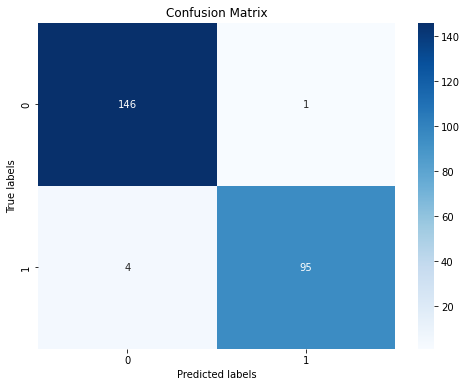

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

def random_forest_classifier(X_train, X_test, Y_train, Y_test):
    # initialize object for RandomForestClassifier class
    rf_classifier = RandomForestClassifier(n_estimators=50)
    # train model using fit method
    print("Model training starts........")
    rf_classifier.fit(X_train, Y_train.values.ravel())
    acc_score = rf_classifier.score(X_test, Y_test)
    print(f'Accuracy of model on test dataset: {acc_score}')
    # predict result using test dataset
    y_pred = rf_classifier.predict(X_test)
    # confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print(f"Confusion Matrix :- \n {cm}")
    # classification report for f1-score
    print(f"Classification Report :- \n {classification_report(Y_test, y_pred)}")

    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()


# calling random_forest_classifier
random_forest_classifier(X_train, X_test, Y_train, Y_test)



# **Decision Tree Algorithm**

In [ ]:
class_counts = credit_card_data['Class'].value_counts()
print("Number of samples for each class:")
print(class_counts)
non_fraud = class_counts[0]
fraud = class_counts[1]
print("Non-fraudulent Numbers:", non_fraud)
print("Fraudulent Numbers:", fraud)

Number of samples for each class:
0.0    249057
1.0       496
Name: Class, dtype: int64
Non-fraudulent Numbers: 249057
Fraudulent Numbers: 496


In [ ]:
import numpy as np
## Equalize the number of samples for both target classes
# Get indexes of non-fraudulent samples
nonfraud_indices = credit_card_data[credit_card_data.Class == 0].index
fraud_indices = np.array(credit_card_data[credit_card_data.Class == 1].index)
# Randomly select non-fraudulent samples that are equal to the number of fraudulent samples
random_normal_indices = np.random.choice(nonfraud_indices, size=len(fraud_indices), replace=False)
random_normal_indices = np.array(random_normal_indices)

In [ ]:
## Undersampling techniques

# Concatenate the indices of fraud and non-fraud transactions
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# Extract all features for the under-sampled indices
under_sample_data = credit_card_data.iloc[under_sample_indices, :]

# Split the under-sampled data into features (X) and target (y)
X_undersample_data = under_sample_data.drop(['Class'], axis=1)
y_undersample_data = under_sample_data['Class']

# Split the dataset into train and test datasets
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(
    X_undersample_data, y_undersample_data, test_size=0.2, random_state=0)

Model training starts........
Model training completed
Accuracy of model on test dataset: 0.9798994974874372
Confusion Matrix:
[[96  2]
 [ 2 99]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        98
         1.0       0.98      0.98      0.98       101

    accuracy                           0.98       199
   macro avg       0.98      0.98      0.98       199
weighted avg       0.98      0.98      0.98       199

AROC score: 0.979894928268337


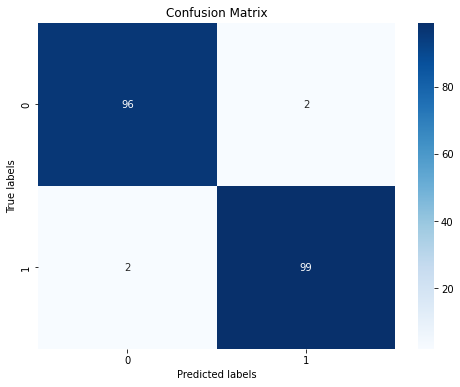

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

def decision_tree_classification(X_train, X_test, Y_train, Y_test):
    # Initialize object for DecisionTreeClassifier class
    dt_classifier = DecisionTreeClassifier(criterion='gini')
    # Train model using fit method
    print("Model training starts........")
    dt_classifier.fit(X_train, Y_train.values.ravel())
    print("Model training completed")
    acc_score = dt_classifier.score(X_test, Y_test)
    print(f'Accuracy of model on test dataset: {acc_score}')
    # Predict result using test dataset
    y_pred = dt_classifier.predict(X_test)
    # Confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    print(f"Confusion Matrix:\n{cm}")
    # Classification report for f1-score
    print(f"Classification Report:\n{classification_report(Y_test, y_pred)}")
    # AROC score
    aroc_score = roc_auc_score(Y_test, y_pred)
    print(f"AROC score: {aroc_score}")

    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.show()


# Calling decision_tree_classification function
decision_tree_classification(X_train_sample, X_test_sample, y_train_sample, y_test_sample)